In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [ ]:
#printing the 11th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


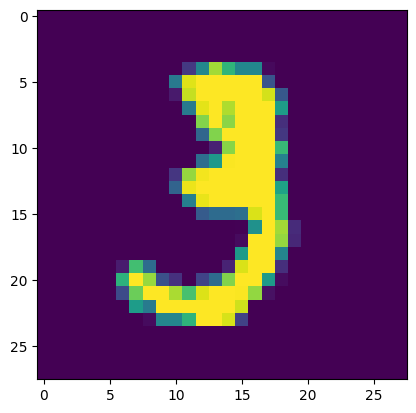

3


In [ ]:
#displaying the image
plt.imshow(X_train[10])
plt.show()

#print the corresponding label
print(y_train[10])

Image Lables

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y_test
print(np.unique(y_test))

#unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [ ]:
#scaling the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
#printing the 11th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the nural network

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
#compiling the nural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']

)

In [ ]:
#training the nural network
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3223 - accuracy: 0.9066 - val_loss: 0.1414 - val_accuracy: 0.9637
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1508 - accuracy: 0.9552 - val_loss: 0.1187 - val_accuracy: 0.9673
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1140 - accuracy: 0.9650 - val_loss: 0.1140 - val_accuracy: 0.9682
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0908 - accuracy: 0.9721 - val_loss: 0.1122 - val_accuracy: 0.9688
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0772 - accuracy: 0.9755 - val_loss: 0.0969 - val_accuracy: 0.9738
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9796 - val_loss: 0.1096 - val_accuracy: 0.9703
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.1070 - val_accuracy

**Training Data Accuracy = 97.43%**

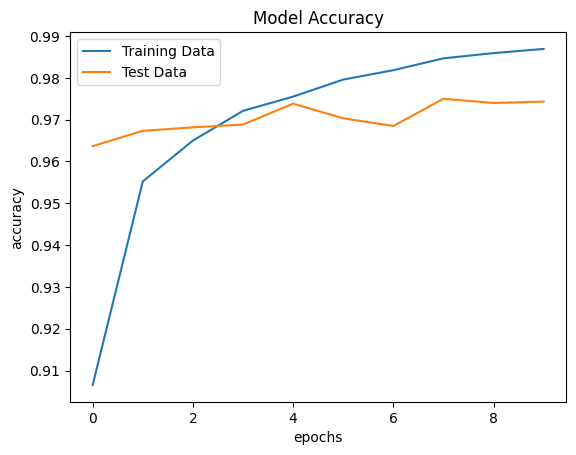

In [ ]:
#visualizing the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['Training Data', 'Test Data'], loc = 'best')
plt.show()

Accuracy on test data

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9703
0.10828866064548492
0.970300018787384


In [ ]:
print(X_test.shape)

(10000, 28, 28)


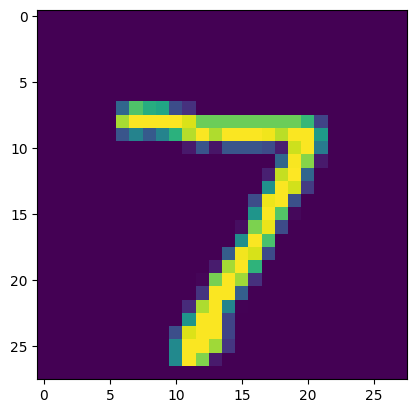

In [ ]:
#first data point in test data
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[3.6854185e-02 8.5099612e-04 9.5100218e-01 9.8782140e-01 1.3281031e-09
 7.9833105e-02 3.8990940e-08 9.9999028e-01 7.4818172e-02 3.5597816e-01]


In [ ]:
# converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 970    0    3    1    0    3    2    0    1    0]
 [   0 1122    4    3    0    1    2    0    3    0]
 [   3    5 1006    3    1    1    4    2    7    0]
 [   0    0    6  990    0    5    0    3    3    3]
 [   0    1    8    2  934    6    4    2    5   20]
 [   2    0    0    9    0  872    3    0    4    2]
 [   4    4    5    2    2    5  933    0    3    0]
 [   0    3   14   11    0    0    0  986    8    6]
 [   4    0    7   11    1   12    3    2  931    3]
 [   3    5    0   12    4   10    0    6    9  960]], shape=(10, 10), dtype=int32)


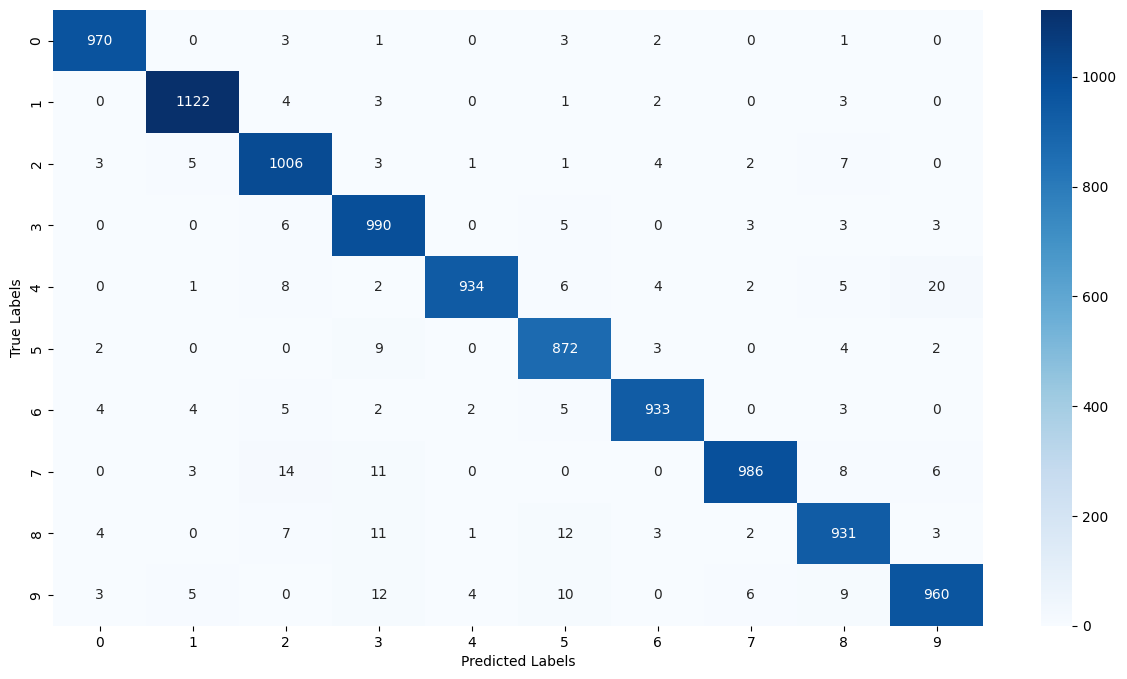

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Building the predictive system

In [ ]:
input_img_path = '/content/MNIST_digit.png'
input_img = cv2.imread(input_img_path)

In [ ]:
type(input_img)

numpy.ndarray

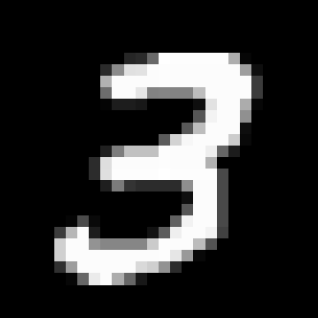

In [ ]:
cv2_imshow(input_img)

In [ ]:
input_img.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_img_resized = cv2.resize(grayscale,(28,28))

In [ ]:
input_img_resized.shape

(28, 28)

In [ ]:
cv2_imshow(input_img_resized)

In [ ]:
input_img_resized = input_img_resized/255

In [ ]:
type(input_img_resized)

numpy.ndarray

In [ ]:
img_reshaped = np.reshape(input_img_resized,[1,28,28])

In [ ]:
input_prediction = model.predict(img_reshaped)

1/1 [==============================] - 0s 38ms/step


In [ ]:
input_prediction_label = np.argmax(input_prediction)

In [ ]:
print(input_prediction_label )

3


Predictive System

In [ ]:
input_img_path = input('Path of the image to be predicted: ')

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)

grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

input_img_resized = cv2.resize(grayscale,(28,28))

input_img_resized = input_img_resized/255

img_reshaped = np.reshape(input_img_resized,[1,28,28]) # if we have a RGB img we need to include 3 also

input_prediction = model.predict(img_reshaped)

input_prediction_label = np.argmax(input_prediction)

print(f'The Handwritten Digit is recognised as : {input_prediction_label}')